In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_images = np.loadtxt('./data/train_images3.txt') # incarcam imaginile
train_labels = np.loadtxt('./data/train_labels3.txt', 'float').astype(int) # incarcam etichetele avand

test_images = np.loadtxt('./data/test_images3.txt') # incarcam imaginile
test_labels = np.loadtxt('./data/test_labels3.txt', 'float').astype(int) # incarcam etichetele avand

2. Definiți metoda classify_image(self, test_image, num_neighbors = 3, metric = 'l2') care clasifică imaginea test_image cu metoda celor mai apropiați vecini, numărul vecinilor este stabilit de parametru num_neighbors, iar distanța poate fi L1 sau L2, în funcție de parametrul metric.

In [6]:
class KNN:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        
        
    #formulele distantelor L1 si L2 date in cerinta    
    def L2(self, sample, data):
        return np.sqrt( np.sum((data - sample)**2, axis=-1))
    
    def L1(self, sample ,data):
        return np.sum(np.abs(data - sample), axis=-1)
    
        
        
    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'):
        
        # Se calculează distanța între imaginea de test (test_image) și toate 
        # imaginile din setul de antrenament (self.train_images) 
        # folosind funcția distance_metric. Aceasta va returna un array 
        # de distanțe.
        distance_metric = self.L1 if metric == 'l1' else self.L2
    
    # Se sortează distanțele calculate și se selectează primii num_neighbors
    # vecini cei mai apropiați (cei cu cele mai mici valori de distanță) 
    # folosind np.argsort
        neighbors = np.argsort(distance_metric(test_image, self.train_images))[:num_neighbors]
        # Se obțin etichetele corespunzătoare vecinilor selectați din setul de
        # antrenament (self.train_labels[neighbors]).
        
        # Se calculează numărul de apariții ale fiecărei etichete în vecinii selectați 
        # folosind np.unique(self.train_labels[neighbors], return_counts=True). Acest 
        # lucru furnizează o listă cu etichetele distincte (neighs) și numărul de 
        # apariții ale acestora (counts).
        
        neighs, counts = np.unique(self.train_labels[neighbors], return_counts = True)
        # Se returnează eticheta care are cel mai mare număr de apariții în vecinii 
        # selectați 
        return neighs[np.argmax(counts)]
        
        

In [12]:
knn = KNN(train_images, train_labels)

3. Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare având ca distanța ‘l2’ și numărul de vecini 3. Salvați predicțiile în fișierul predictii_3nn_l2_mnist.txt.

In [13]:
def classify_test_images(test_images, num_vec = 3, distance = 'l2'):
    # Funcția primește o listă de imagini de test (test_images) 
    # și efectuează clasificarea acestora folosind algoritmul k-NN 
    # cu o distanță L2 și un număr de vecini de 3. . 
    preds = np.array([knn.classify_image(test_image, num_vec, distance) for test_image in test_images])
    acc = np.sum(preds == test_labels) / len(preds)
    print(f"Num neighbors : {num_vec}, distance : {distance}, Acc  {acc}")
    return acc

In [9]:
classify_test_images(test_images)

Num neighbors : 3, distance : l2, Acc  0.898


0.898

Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare având ca distanța L2 și numărul de vecini ∈ [1, 3, 5, 7, 9].
a. Plotați un grafic cu acuratețea obținuta pentru fiecare vecin și salvați scorurile în fișierul acuratete_l2.txt.
b. Repetați punctul anterior pentru distanța L1. Plotați graficul de la punctul anterior în aceeași figură cu graficul curent (utilizați fișierul acuratete_l2.txt).

In [10]:
accs_l2 = [ classify_test_images(test_images, num_vec = i, distance = 'l2') for i in [1,3, 5, 7, 9]]
accs_l1 = [ classify_test_images(test_images, num_vec = i, distance = 'l1') for i in [1,3, 5, 7, 9]]

Num neighbors : 1, distance : l2, Acc  0.884
Num neighbors : 3, distance : l2, Acc  0.898
Num neighbors : 5, distance : l2, Acc  0.896
Num neighbors : 7, distance : l2, Acc  0.88
Num neighbors : 9, distance : l2, Acc  0.88
Num neighbors : 1, distance : l1, Acc  0.88
Num neighbors : 3, distance : l1, Acc  0.884
Num neighbors : 5, distance : l1, Acc  0.868
Num neighbors : 7, distance : l1, Acc  0.864
Num neighbors : 9, distance : l1, Acc  0.864


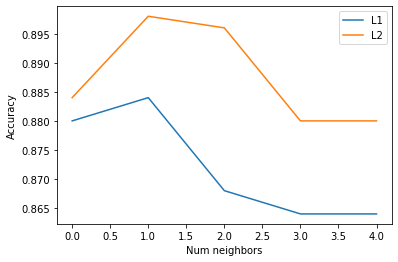

In [11]:
plt.plot(np.arange(len(accs_l1)), accs_l1)
plt.plot(np.arange(len(accs_l2)), accs_l2)
plt.xlabel('Num neighbors')
plt.ylabel("Accuracy")
plt.legend(["L1","L2"])


plt.show()